# Experiment 6 : Grow of stables attractors fields in Aleatory CBN

This experiment explore the growth of local networks in CBN with Linear topology. Its important see what happened with the Linear CBN with more local networks

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the database
# df = pd.read_csv("outputs/exp6_data_3_9_10/data.csv")
# df = pd.read_csv("outputs/exp6_data_3_9_100/data.csv")
# df = pd.read_csv("outputs/exp6_data_3_9_1000/data.csv")
df = pd.read_csv("outputs/exp6_data_3_9_10/data.csv")
# df = pd.read_csv("outputs/exp6_data_3_6_10/data.csv")
df.keys()

Index(['i_sample', 'n_local_networks', 'n_var_network', 'v_topology',
       'n_output_variables', 'n_clauses_function', 'n_edges',
       'n_local_attractors', 'n_pair_attractors', 'n_attractor_fields',
       'n_time_find_attractors', 'n_time_find_pairs', 'n_time_find_fields'],
      dtype='object')

## General Statistics

### Statistics

In [13]:
# Seleccionar las columnas requeridas
df_resume = df[['n_local_networks','n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']]
# Describe the DataFrame to summarize statistics
df_resume_describe = df_resume[['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']].describe()
df_resume_describe

,n_local_attractors,n_pair_attractors,n_attractor_fields
count,70.000000,70.000000,70.000000
mean,26.228571,93.742857,12215.042857
std,16.226809,113.104375,63077.500850
min,6.000000,0.000000,0.000000
25%,14.250000,10.250000,1.000000
50%,20.500000,54.500000,16.500000
75%,37.500000,132.750000,1093.500000
max,75.000000,488.000000,510064.000000


In [14]:
# Format the values to two decimal places
stats_formatted = df_resume.describe().applymap(lambda x: f"{x:.2f}")

# Export the descriptive statistics to a LaTeX table
latex_text = stats_formatted.to_latex(
    index=True,       # Include the index
    bold_rows=True,   # Make the index bold
    column_format='lccc',  # Column format (l: left, c: center, r: right)
    header=True,      # Include column headers
    caption='Descriptive Statistics of the Data',  # Add a caption
    label='tab:descriptive_stats'  # Add a label
)

# Escape the '%' character in the LaTeX string
latex_text_escaped = latex_text.replace('%', r'\%')
print(latex_text_escaped)

\begin{table}
\caption{Descriptive Statistics of the Data}
\label{tab:descriptive_stats}
\begin{tabular}{lccc}
\toprule
 & n_local_networks & n_local_attractors & n_pair_attractors & n_attractor_fields \\
\midrule
\textbf{count} & 70.00 & 70.00 & 70.00 & 70.00 \\
\textbf{mean} & 6.00 & 26.23 & 93.74 & 12215.04 \\
\textbf{std} & 2.01 & 16.23 & 113.10 & 63077.50 \\
\textbf{min} & 3.00 & 6.00 & 0.00 & 0.00 \\
\textbf{25\%} & 4.00 & 14.25 & 10.25 & 1.00 \\
\textbf{50\%} & 6.00 & 20.50 & 54.50 & 16.50 \\
\textbf{75\%} & 8.00 & 37.50 & 132.75 & 1093.50 \\
\textbf{max} & 9.00 & 75.00 & 488.00 & 510064.00 \\
\bottomrule
\end{tabular}
\end{table}



### Histograms

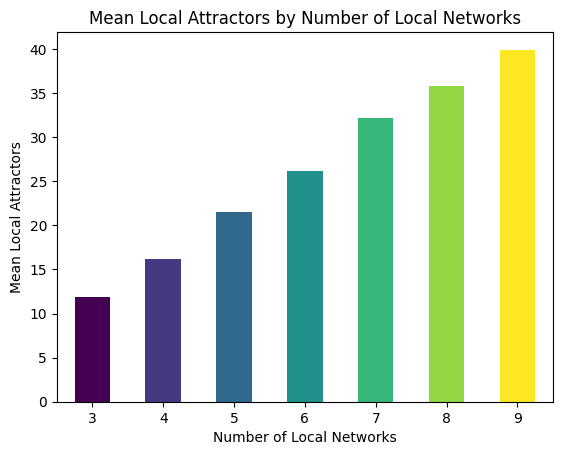

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import  numpy as np

# Group by 'n_local_networks' and calculate the mean of 'n_local_attractors'
grouped_data = df.groupby('n_local_networks')['n_local_attractors'].mean()

# Determine number of unique groups
num_groups = len(grouped_data)

# Choose a colormap (recommended way)
cmap = matplotlib.colormaps['viridis']  # Access colormap by name

# Create colors array from the colormap
colors = cmap(np.linspace(0, 1, num_groups))

# Create the bar plot with different colors for each bar
grouped_data.plot(kind='bar', color=colors)

# Customize the plot
plt.title('Mean Local Attractors by Number of Local Networks')
plt.xlabel('Number of Local Networks')
plt.ylabel('Mean Local Attractors')
plt.xticks(rotation=0)

# Show the plot
plt.show()

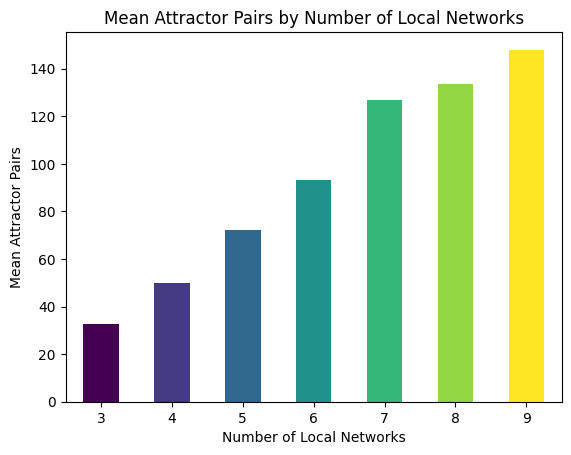

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Group by 'n_local_networks' and calculate the mean of 'n_pair_attractors'
grouped_data = df.groupby('n_local_networks')['n_pair_attractors'].mean()

# Determine number of unique groups
num_groups = len(grouped_data)

# Choose a colormap (recommended way)
cmap = matplotlib.colormaps['viridis']  # Access colormap by name

# Create colors array from the colormap
colors = cmap(np.linspace(0, 1, num_groups))

# Create the bar plot with different colors for each bar
grouped_data.plot(kind='bar', color=colors)

# Customize the plot
plt.title('Mean Attractor Pairs by Number of Local Networks')
plt.xlabel('Number of Local Networks')
plt.ylabel('Mean Attractor Pairs')
plt.xticks(rotation=0)

# Show the plot
plt.show()    

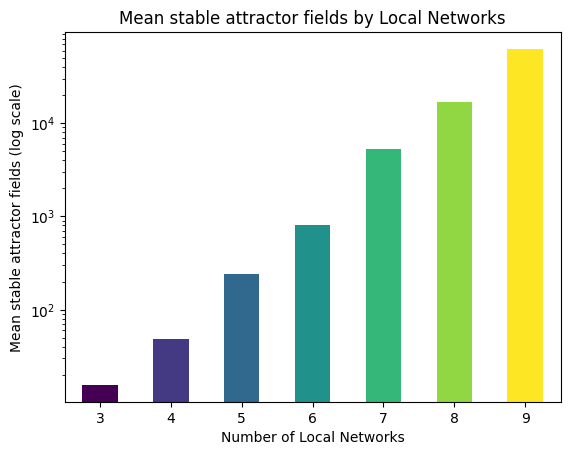

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Group by 'n_local_networks' and calculate the mean of 'n_attractor_fields'
grouped_data = df.groupby('n_local_networks')['n_attractor_fields'].mean()

# Determine number of unique groups (optional)
num_groups = len(grouped_data)

# Choose a colormap
cmap = matplotlib.colormaps['viridis']  # Access colormap by name

# Create colors array from the colormap (optional, for color variation)
# You can remove these lines if you don't want color variation
colors = cmap(np.linspace(0, 1, num_groups))

# Create the bar plot with logarithmic scale on the y-axis
grouped_data.plot(kind='bar', logy=True, color=colors)  # Use colors if desired

# Customize the plot
plt.title('Mean stable attractor fields by Local Networks')
plt.xlabel('Number of Local Networks')
plt.ylabel('Mean stable attractor fields (log scale)')
plt.xticks(rotation=0)

# Show the plot
plt.show()

### Bloxplots and Violin Diagrams

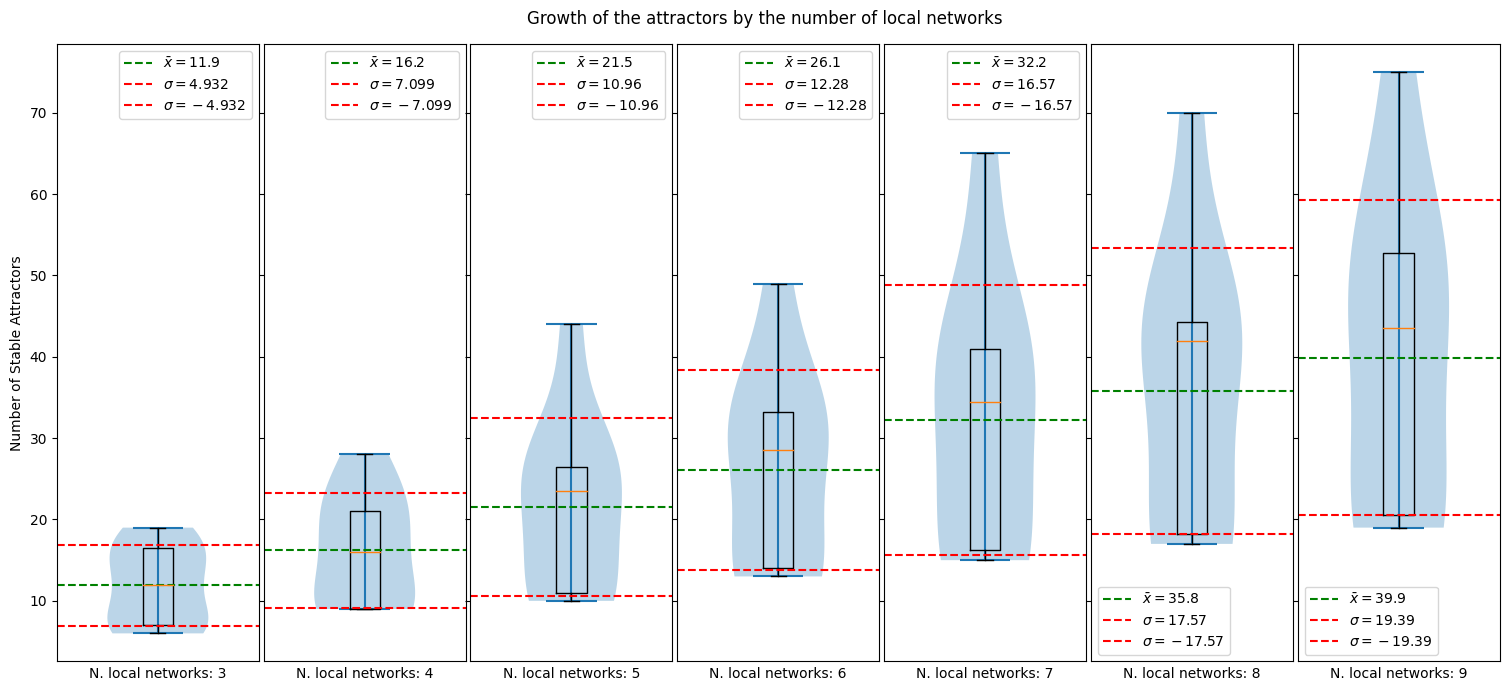

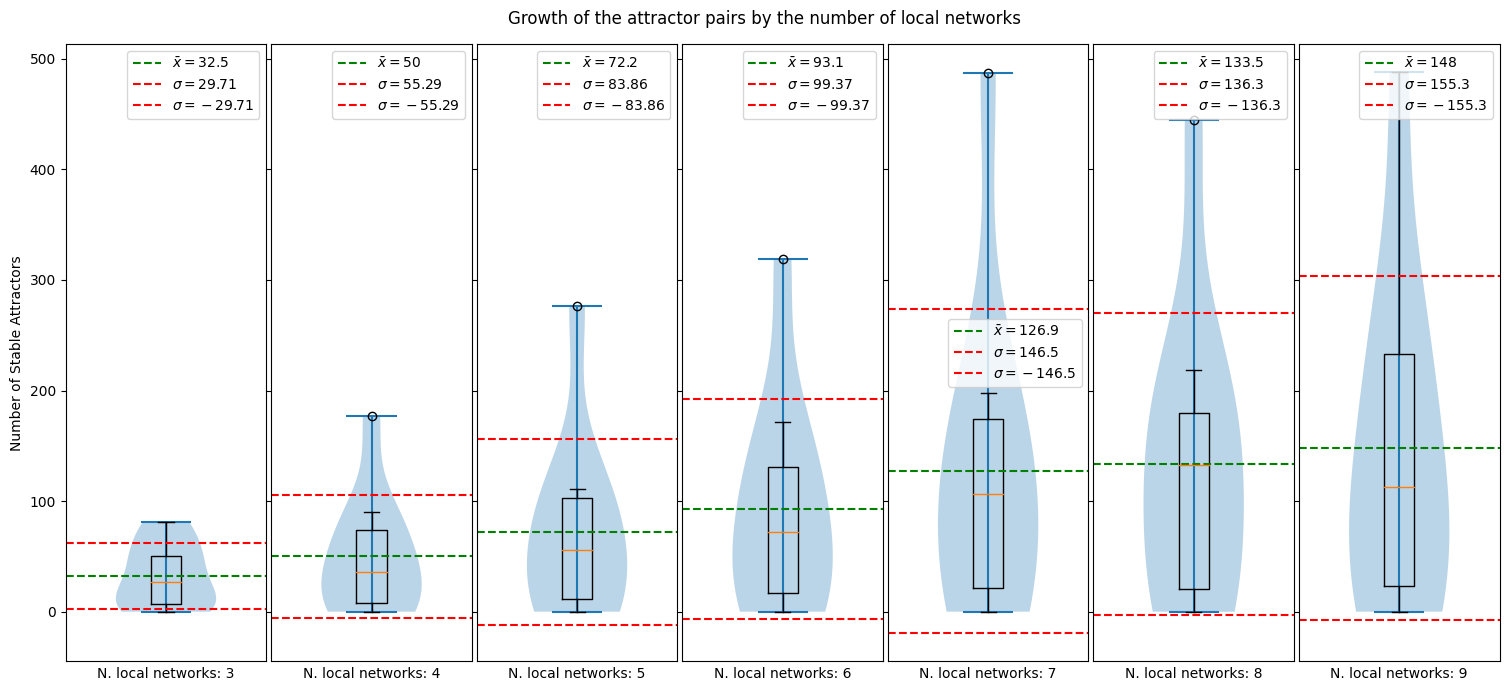

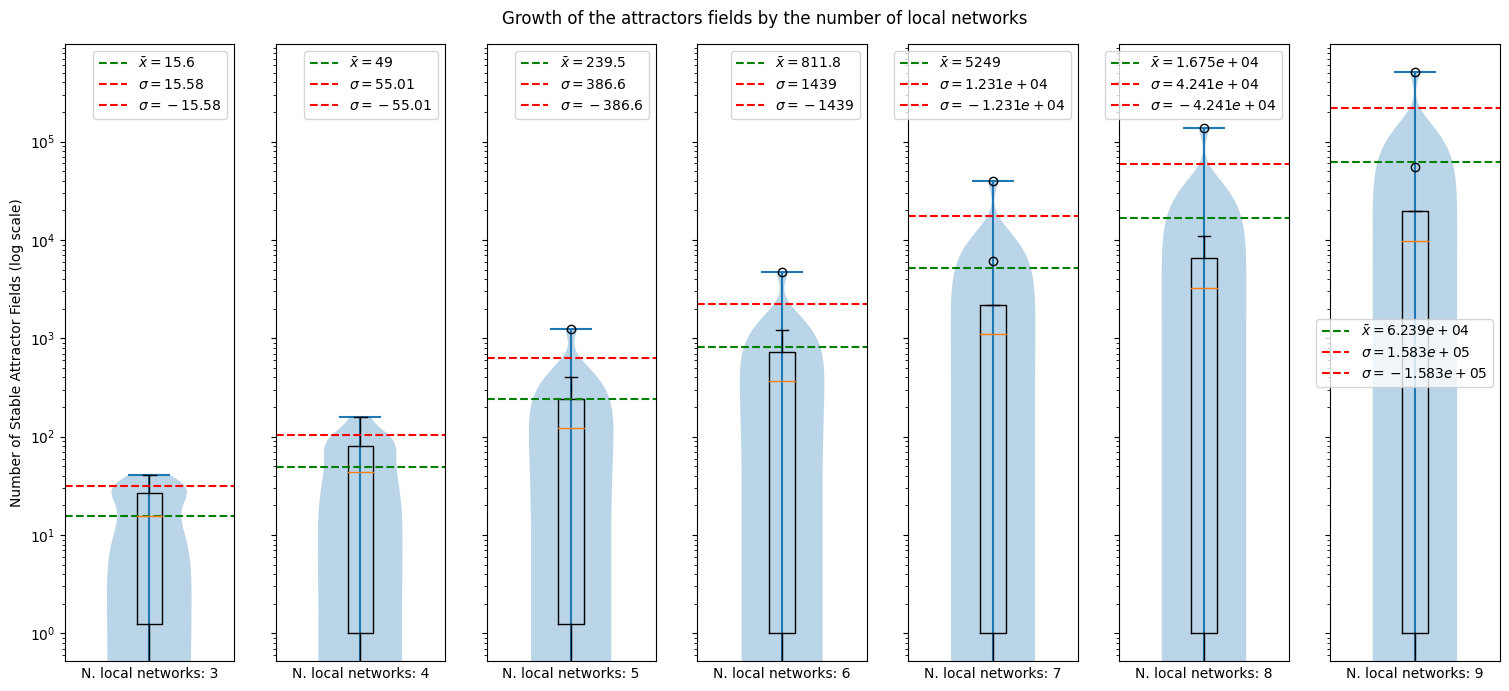

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumiendo que 'df_resume' es tu DataFrame

# Obtener los últimos tres valores únicos de n_local_networks
n_local_networks_unique = df_resume['n_local_networks'].unique()
n_local_networks_last_three = sorted(n_local_networks_unique)

# Gráficos de violín
attributes = ['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']
titles = ['Growth of the attractors by the number of local networks',
          'Growth of the attractor pairs by the number of local networks',
          'Growth of the attractors fields by the number of local networks']

for attribute, title in zip(attributes, titles):
    fig, axs = plt.subplots(1, len(n_local_networks_last_three), sharey=True, figsize=(15, 7))

    for i, n_networks in enumerate(n_local_networks_last_three):
        data = df_resume[df_resume['n_local_networks'] == n_networks][attribute]

        axs[i].violinplot(data)
        axs[i].boxplot(data)
        axs[i].set_xlabel(f'N. local networks: {n_networks}')
        axs[i].set_xticks([])
        axs[i].set_xlim((0.5, 1.5))

        mean = data.mean()
        std_dev = data.std()
        axs[i].axhline(mean, color='g', ls='--', label=fr'$\bar{{x}}={mean:.4g}$')
        axs[i].axhline(mean + std_dev, color='r', ls='--', label=fr'$\sigma={std_dev:.4g}$')
        axs[i].axhline(mean - std_dev, color='r', ls='--', label=fr'$\sigma=-{std_dev:.4g}$')
        axs[i].legend()

        if attribute == 'n_attractor_fields':  # Aplicar escala logarítmica solo en el último atributo
            axs[i].set_yscale('log')

    fig.suptitle(f'{title}')
    fig.tight_layout(w_pad=0)

    # Set y-label for the first subplot only (shared y-axis)
    axs[0].set_ylabel('Number of Stable Attractor Fields (log scale)' if attribute == 'n_attractor_fields' else 'Number of Stable Attractors')

plt.show()

### Incremental Taxs

In [19]:
# Sort the DataFrame by 'i_sample' and 'n_local_networks'
df_sorted = df.sort_values(['i_sample', 'n_local_networks'])

# Calculate the difference in 'n_attractor_fields' for each pair of consecutive values of 'n_local_networks' for a same 'i_sample'
df_sorted['diff_n_attractor_fields'] = df_sorted.groupby(['i_sample'])['n_attractor_fields'].diff()

# Remove rows containing NaN (corresponding to the first value of 'n_local_networks' for each 'i_sample')
df_sorted = df_sorted.dropna(subset=['diff_n_attractor_fields'])

# Calculate the average of the differences per 'i_sample'
average_diff_by_i_sample = df_sorted.groupby('i_sample')['diff_n_attractor_fields'].mean()

# Display the summary statistics of the average differences per 'i_sample'
average_diff_by_i_sample.describe()

count       10.000000
mean     10395.283333
std      26373.963070
min         -0.500000
25%          0.000000
50%       1638.000000
75%       3286.125000
max      85003.833333
Name: diff_n_attractor_fields, dtype: float64

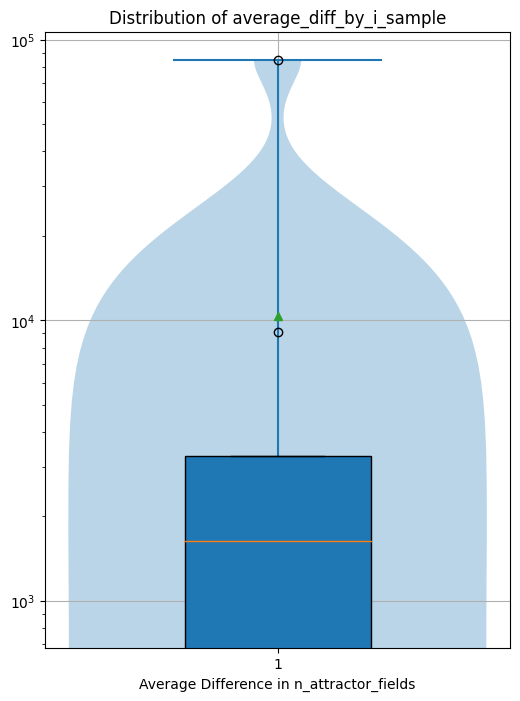

In [20]:
# Violin graph and boxplot for 'average_diff_by_i_sample'
plt.figure(figsize=(6, 8))

# Violin plot
plt.violinplot(average_diff_by_i_sample.values, vert=True, widths=0.9)

# Boxplot
plt.boxplot(average_diff_by_i_sample.values, vert=True, widths=0.4, patch_artist=True, showmeans=True)

# Log scale for y-axis
plt.yscale('log')

# Customize plot
plt.title('Distribution of average_diff_by_i_sample')
plt.xlabel('Average Difference in n_attractor_fields')
plt.ylabel('')
plt.grid(True)

# Show plot
plt.show()

### Top 20

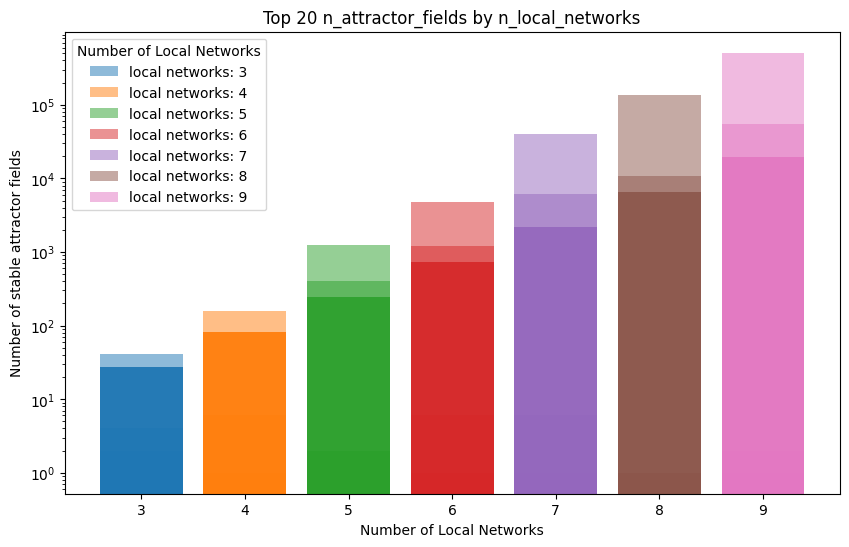

In [21]:
# Group by 'n_local_networks' and find the top 20 values of 'n_attractor_fields' for each group
top_20_by_n_local_network = df.groupby('n_local_networks')['n_attractor_fields'].nlargest(20)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))

# Iterate over each group and draw the bars only for the top 20 values
for network, values in top_20_by_n_local_network.groupby(level=0):
    plt.bar([f'{network}'] * len(values), values.values, label=f'local networks: {network}', alpha=0.5)

# Customize the plot
plt.title('Top 20 n_attractor_fields by n_local_networks')
plt.xlabel('Number of Local Networks')
plt.ylabel('Number of stable attractor fields')
plt.yscale('log')  # Apply log scale on the y-axis
plt.legend(title='Number of Local Networks')

# Show the plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (20,) and (10,)

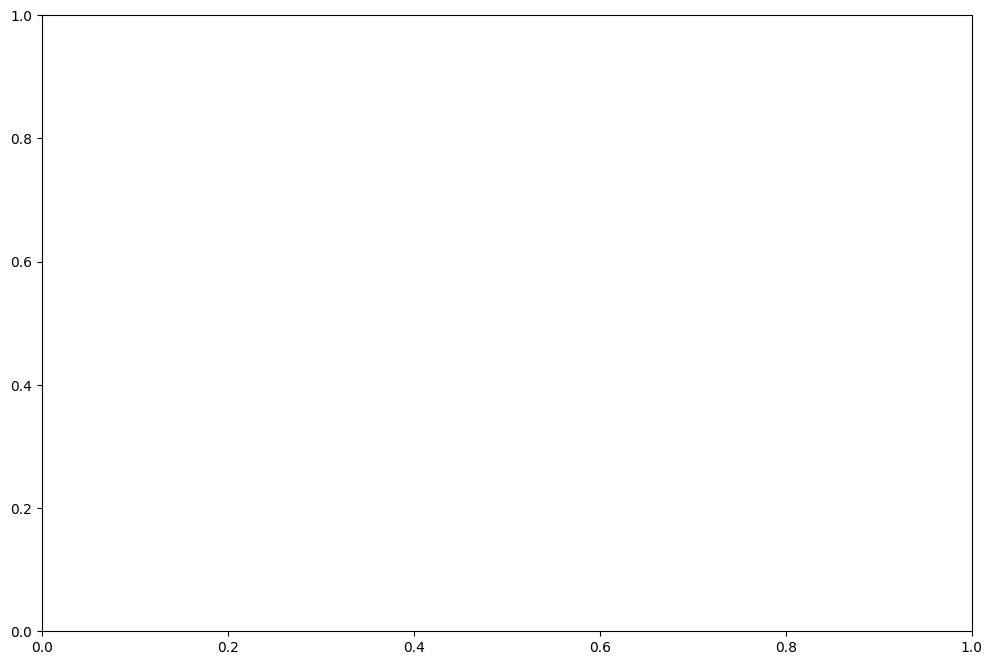

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumiendo que 'df' es tu DataFrame

# Define the target network and other networks
target_network = 9  # Network for which to get top 20 n_attractor_fields
other_networks = [8, 7, 6, 5, 4, 3]  # Networks for which to compare sample values

# Get top 20 n_attractor_fields for the target network
target_df = df[df['n_local_networks'] == target_network]
top_20_by_n_attractor_fields = target_df.nlargest(20, 'n_attractor_fields')

# Sort the top 20 by 'n_attractor_fields' to ensure the order is from max to min
top_20_by_n_attractor_fields = top_20_by_n_attractor_fields.sort_values(by='n_attractor_fields', ascending=False)
top_20_samples = top_20_by_n_attractor_fields['i_sample'].tolist()

# Extract sample values for other networks
other_network_samples = {}
for network in other_networks:
    # Filter data for the current network
    other_network_df = df[df['n_local_networks'] == network]

    # Filter to include only samples present in the reference
    filtered_network_df = other_network_df[other_network_df['i_sample'].isin(top_20_samples)]

    # Sort the filtered network data by 'i_sample' according to the top_20_samples order
    filtered_network_df['i_sample'] = pd.Categorical(filtered_network_df['i_sample'], categories=top_20_samples, ordered=True)
    filtered_network_df = filtered_network_df.sort_values(by='i_sample')

    # Extract and store sample values
    other_network_samples[network] = filtered_network_df

# Generate the comparison chart
plt.figure(figsize=(12, 8))

# Plot scatter points for the target network
plt.plot(range(1, 21), top_20_by_n_attractor_fields['n_attractor_fields'], color='red', linestyle='-', alpha=0.7, label=f'Network: {target_network}')
plt.scatter(range(1, 21), top_20_by_n_attractor_fields['n_attractor_fields'], color='red', marker='o', alpha=0.7)

# Plot lines and scatter points for other networks
for network, filtered_network_df in other_network_samples.items():
    # Get the order of samples for the current network
    network_order = [top_20_samples.index(sample) + 1 for sample in filtered_network_df['i_sample']]

    # Plot line
    plt.plot(network_order, filtered_network_df['n_attractor_fields'], color=f'C{network}', linestyle='-', alpha=0.7, label=f'Network: {network}')

    # Plot scatter points
    plt.scatter(network_order, filtered_network_df['n_attractor_fields'], color=f'C{network}', marker='o', alpha=0.7)

# Apply log scale to y-axis
plt.yscale('log')

# Customize the plot
plt.title('Comparison of Number of Attractor Fields for Top 20 for Network 9 with his predecessors')
plt.xlabel('Decrement order  of Top 20')
plt.xticks(range(1, 21))  # Set x-axis ticks to be integers from 1 to 20
plt.ylabel('Number of Attractor Fields (Log Scale)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### Dispersion Graph

In [ ]:
# Create a scatter plot
plt.scatter(df['n_time_find_fields'], df['n_attractor_fields'])
plt.xlabel('Time to find attractor fields (in seconds)')
plt.ylabel('Number of attractor fields')
plt.title('Scatter plot between time and number of attractor fields')
plt.show()

### Power-Law Distribution

In [ ]:
# Calcular el histograma de frecuencias
histogram = df['n_attractor_fields'].value_counts()

# Graficar el histograma
plt.figure(figsize=(10, 6))
histogram.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Histograma de distribución de ley de potencias para n_attractor_fields')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

## Specific Statistics

### Local Networks = 9